## Receiver Operating Characteristic (ROC)

- ROC metric to evaluate classifier output quality.


- ROC curves typically feature true positive(TP) rate on the Y axis, and false positive(FP)
  rate on the X axis.
  
  
- ROC curve is typically used in binary classification to study the output of a classifier.


- Shows trade-off between True positive and False Positive rate

<img src="images/roc.png" width='50%'/>

### The area under ROC Curve is called Area Under the Curve (AUC) 

<img src="images/auc.png" width='60%'/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('dataset/data.csv',header=None)

In [3]:
data.columns=['Pregnancies','Glucose','BloodPressure','SkinThickness' ,
              'Insulin' ,'BMI' ,'DiabetesPedigreeFunction' ,'Age','Outcome']

In [4]:
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
data.shape

(768, 9)

In [6]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
X = np.array(data[['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
#X = StandardScaler().fit_transform(X)
y = np.array(data['Outcome'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [9]:
scd = StandardScaler()
X_std=scd.fit_transform(X_train)

In [ ]:
from sklearn.model_selection import KFold,cross_val_score


kf = KFold(n_splits=5)
res = cross_val_score(LogisticRegression(),X_std,y_train,cv=kf,scoring='accuracy')
print np.mean(res)

In [10]:
log1=RandomForestClassifier()
log1.fit(X_std,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
log1.score(scd.transform(X_test),y_test)

0.70833333333333337

In [12]:
conn=confusion_matrix(y_test,log1.predict(scd.transform(X_test)))
conn

array([[109,  25],
       [ 31,  27]], dtype=int64)

In [13]:
np.bincount(y_test)

array([134,  58], dtype=int64)

In [18]:
y_pred_prob_1 = log1.predict_proba(scd.transform(X_test))[:,1]

In [19]:
X_test.shape

(192L, 4L)

In [16]:
y_p=log1.predict(scd.transform(X_test))

In [17]:
y_p[:5]

array([1, 0, 0, 0, 1], dtype=int64)

In [14]:
l1=log1.predict_proba(scd.transform(X_test))

In [15]:
l1[:5]

array([[ 0.2,  0.8],
       [ 1. ,  0. ],
       [ 0.5,  0.5],
       [ 0.6,  0.4],
       [ 0.3,  0.7]])

In [20]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,threshold=roc_curve(y_test,y_pred_prob_1)

In [24]:
threshold
#fpr
#tpr

array([ 2. ,  1. ,  0.9,  0.8,  0.7,  0.6,  0.5,  0.4,  0.3,  0.2,  0.1,
        0. ])

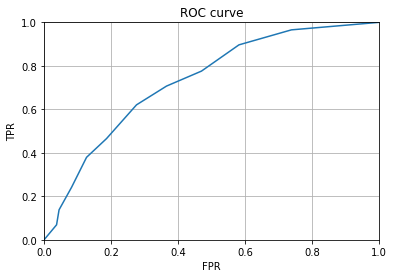

In [26]:
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(True)

### AUC is the percentage of ROC plot that is underneath the curve

- AUC is useful even when there is high class imbalance


- AUC is useful as a single number summary for a classifier performance

In [27]:
# true values , predicted probability for positive class
roc_auc_score(y_test,y_pred_prob_1)

0.72999227997941341

### Confusion matrix

Table that describe the performance of a classification model

In [28]:
y_pred_class = log1.predict(scd.transform(X_test))

In [29]:
conn=confusion_matrix(y_test,y_pred_class)
conn

array([[109,  25],
       [ 31,  27]], dtype=int64)

<img src="images/cm1.png"/>

- True Positives (TP):  Correctly predicted that they do have diabetes


- True Negatives (TN):  Correctly predicted that they don't have diabetes


- False Positives (FP): Incorrectly predicted that they do have diabetes 


- False Negatives (FN): Incorrectly predicted that they don't have diabetes

### Metrics computed from a confusion matrix

#### Classification Accuracy

percentage of correct predictions

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_pred_class)

0.70833333333333337

<img src="images/acc.PNG"/>

In [ ]:
print (101+49)/float(49+101+15+27)

#### Sensitivity: 

- When the actual value is positive, how often is the prediction correct?


- Also known as "True Positive Rate" or "Recall"


- TP / all positive

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(y_test,y_pred_class)

<img src="images/re.PNG"/>

In [ ]:
print 49/float(49+27)

#### Specificity: True Negative Rate

- When the actual value is negative, how often is the prediction correct?


- TN / all negative 

    - all negative = TN + FP

In [ ]:
print(101 / float(101 + 15))

specificity=101 / float(101 + 15)

#### False Positive Rate:

- When the actual value is negative, how often is the prediction incorrect?


- FP / float(TN + FP)

In [ ]:
false_positive_rate = 15 / float(101+ 15)

print(false_positive_rate)
print(1 - specificity)

#### Precision

- It is the number of positive predictions divided by the total number of positive class 
  values predicted.
  
- It is also called the Positive Predictive Value (PPV).

<img src="images/pre.PNG"/>

In [ ]:
print 49/float(49+15)

In [32]:
from sklearn.metrics import precision_score

In [33]:
precision_score(y_test,y_pred_class)

0.51923076923076927

In [34]:
conn=confusion_matrix(y_test,y_pred_class)
conn

array([[109,  25],
       [ 31,  27]], dtype=int64)

In [ ]:
np.where(y_test!=y_p)

In [35]:
y_test[7]

0

In [36]:
y_p[7]

1